In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft

In [5]:
# df = pd.read_csv('Zach EEG Data/Now Zach_ExG.csv')
# df = pd.read_csv('Chethan EEG Data/.csv')
# df = pd.read_csv('Chethan EEG Data/Chethan Alpha_ExG.csv')
df = pd.read_csv('Our Recorded Data/Ilia EEG Data/Background Noise_ExG.csv')
# df = pd.read_csv('Our Recorded Data/Background EEG/Background Noise_ExG.csv')
# timestamps_df = pd.read_csv('Zach EEG Data/Alpha Zach_Marker.csv')
df

,TimeStamp,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,1.376886e+06,-350356.00,-375363.82,-354623.55,-363522.67,-383448.17,-382586.10,-365794.51,-351186.46
1,1.376886e+06,-353621.72,-376166.67,-358209.18,-364616.87,-378199.38,-372523.88,-365668.05,-353166.48
2,1.376886e+06,-363152.02,-373573.11,-365851.88,-365650.08,-365060.09,-352331.06,-364605.18,-361433.64
3,1.376886e+06,-372191.24,-369992.20,-372856.23,-366084.48,-352290.00,-333465.66,-363461.63,-370744.42
4,1.376886e+06,-375412.70,-367771.91,-375424.95,-365853.45,-346941.75,-326083.08,-362905.55,-375591.99
...,...,...,...,...,...,...,...,...,...
154587,1.377194e+06,-348781.25,-372607.99,-352667.95,-361383.29,-381172.13,-380978.20,-363703.53,-349665.11
154588,1.377194e+06,-350129.84,-374298.33,-354977.27,-362421.17,-378300.76,-374065.97,-363876.67,-349935.86
154589,1.377194e+06,-358728.26,-372344.49,-362064.26,-363554.62,-366358.66,-355296.65,-362986.66,-357138.39
154590,1.377194e+06,-368588.35,-368688.44,-369688.65,-364185.95,-352675.00,-334941.47,-361759.80,-366845.22


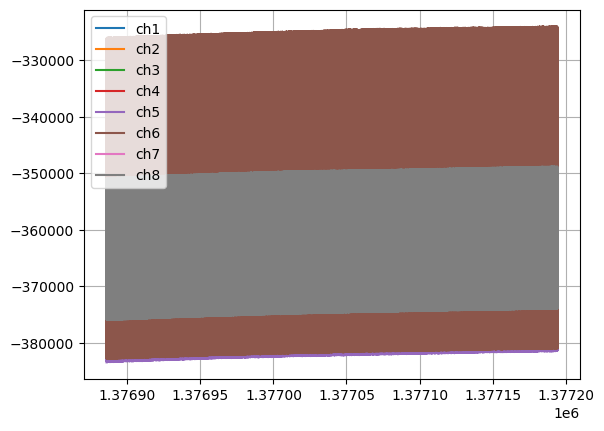

In [8]:
x = np.array(df['TimeStamp'])

# Note that different recordings use different channel names (based on the electrode positions on the head)
for channel in df.columns:
    if channel == "TimeStamp":
        continue
    plt.plot(x, df[channel], label=channel)
plt.legend()
plt.grid()
plt.show()

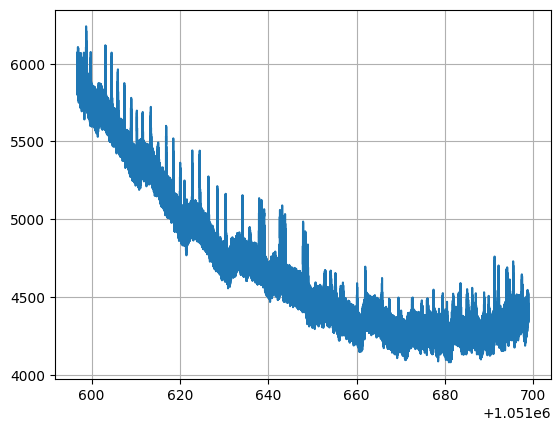

In [4]:
# Work with FP1
y = np.array(df['FP1'])
y = np.where()
plt.plot(x, df["FP1"])
plt.grid()
plt.show()

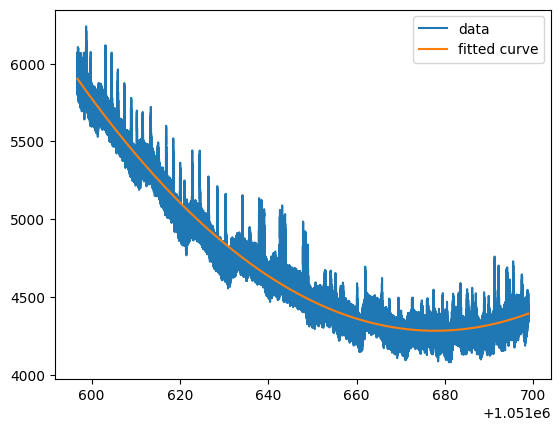

In [5]:
# Get the regression and plot the residual
import numpy as np
import matplotlib.pyplot as plt

# Fit a polynomial of degree 2 (a quadratic function) to the data
p = np.polyfit(x, y, deg=2)

# Evaluate the polynomial at some new points
x_new = x
y_new = np.polyval(p, x_new)

# Plot the original data and the fitted curve
plt.plot(x, y, label='data')
plt.plot(x_new, y_new, label='fitted curve')
plt.legend()
plt.show()

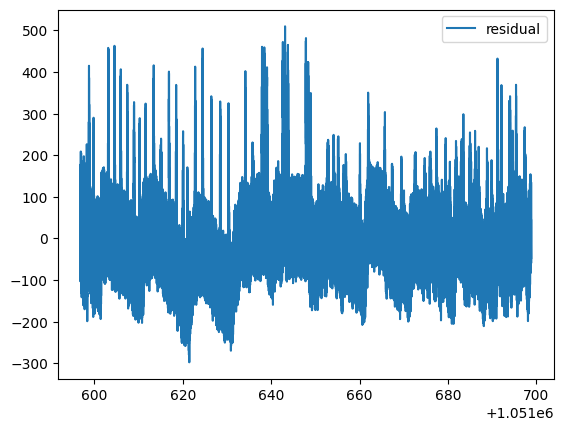

In [9]:
y = y - y_new
plt.plot(x, y, label='residual')
plt.legend()
plt.show()

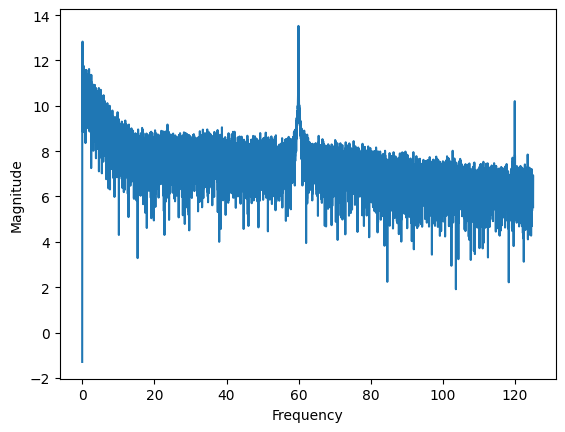

In [10]:
# FFT
n = y.shape[0]
yf = fft(y)[:n//2]
xf = fftfreq(n, x[1] - x[0])[:n//2]

# Plot the FFT
plt.plot(xf, np.log(np.abs(yf)))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

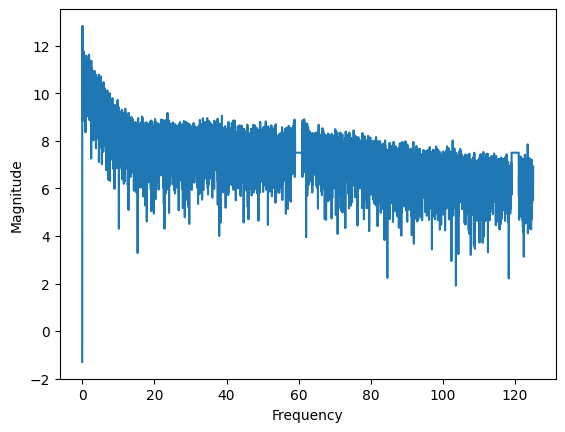

(25536,)
(12768,)


/home/alex/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


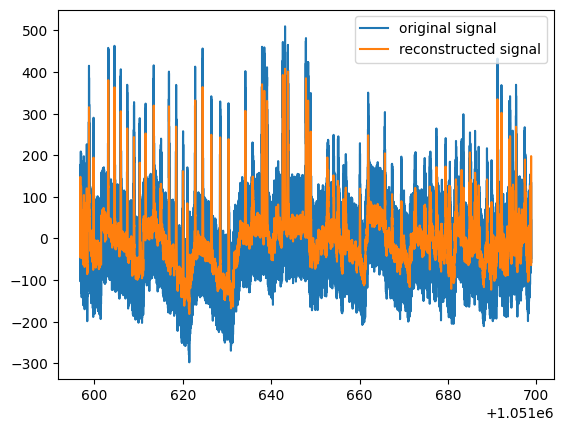

In [16]:
# Remove frequencies under 60, and restore signal using inverse FFT
yf = fft(y)[:n//2]
def remove(freq):
    delta=1
    indices = np.where((xf >= freq-delta) & (xf <= freq+delta))[0]
    yf[indices] = np.exp(7.5)
remove(60)
remove(120)
plt.plot(xf, np.log(np.abs(yf)))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# restore the signal
y_reconstructed = ifft(yf)
print(x.shape)
print(y_reconstructed.shape)
plt.plot(x, y, label='original signal')
def every_other(data):
    nn = data.shape[0]
    every_other_index = np.where(np.arange(nn) % 2 == 0)
    return data[every_other_index]
x_r = every_other(x)
plt.plot(x_r, y_reconstructed, label='reconstructed signal')
plt.legend()
plt.show()

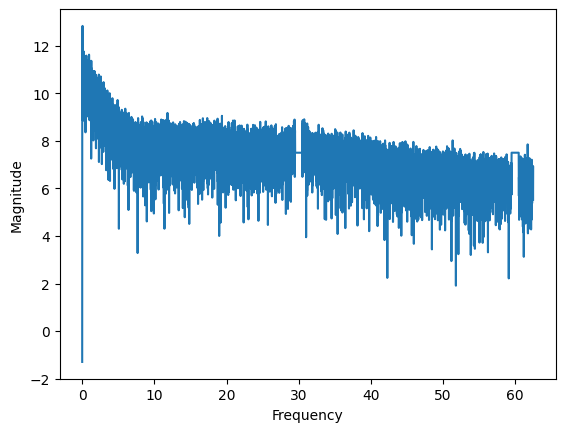

In [17]:
n_r = y_reconstructed.shape[0]
yf_r = fft(y_reconstructed)[:n//2]
xf_r = fftfreq(n, x_r[1] - x_r[0])[:n//2]

# Plot the FFT
plt.plot(xf_r, np.log(np.abs(yf_r)))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()